In [1]:
import random 
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
population_size = 10
crossover_prob = 0.2
mutation_prob = 0.01
range_min = -2.04 
range_max = +2.04

In [3]:
def mutation (x):
    get_bin = lambda x, n: format(x, 'b').zfill(n)
    
    for i in range(5):
        x[i] = int(x[i] * 100)
    
    x_final = []
    for i in range(5):
        
        str1 = ""
        
        str1 = get_bin (x[i] , 7)
        ans = ""
        for j in range (len(str1)):
            r = random.random()
            if (r < mutation_prob):
                if (str1[j] == '0'):
                    ans = ans + '1'
                elif (str1[j] == '1'):
                    ans = ans + '0'
                else: 
                    ans = ans + str1[j]
            else:
                ans = ans + str1[j]
        
        a = int(ans , 2)
        if (a > range_min * 100 and a < range_max * 100):
            x_final.append(a/100)
        else:
            x_final.append(x[i]/100)
        
    return x_final

In [4]:
def crossover_single (x1 , x2):
    get_bin = lambda x, n: format(x, 'b').zfill(n)
    str1 = get_bin (x1 , 11)
    str2 = get_bin (x2 , 11)
    
    r = random.randint(1 ,9)
    child1 = ""
    child2 = ""
    
    for i in range(r):
        child1 = child1 + str1[i]
        child2 = child2 + str2[i]
        
    for i in range (r , len (str1)):
        child1 = child1 + str2[i]
        child2 = child2 + str1[i]
    
    a = int (child1 , 2)
    b = int (child2 , 2)
    return (a , b)

In [5]:
def crossover (x1 , x2):
    get_bin = lambda x, n: format(x, 'b').zfill(n)
    
    
    x_final1 = []
    x_final2 = []
    
    for i in range(5):
        x1[i] = int(x1[i] * 100)
        x2[i] = int(x1[i] * 100)
    
    for j in range(5):
        a , b = crossover_single(x1[j] , x2[j])
        x_final1.append(a/100)
        x_final2.append(b/100)
        
    return (x_final1 , x_final2)

In [6]:
def fun1 (x):
    total = 0
    for i in x:
        total += i*i
        
    return total

In [7]:
def fun2 (x):
    total = 0
    for i in x:
        total += int(i)
        
    return total

In [8]:
def fun3 (x):
    total = 0
    for j , i in zip(range(1 , 6) , x):
        total += j * i**4
        
    total += np.random.normal(0 , 1 , 1)
        
    return total

In [9]:
def fitness(x1 , x2):
    fx1 = fun1 (x1)
    fx2 = fun1 (x2)
    gx1 = fun2 (x1)
    gx2 = fun2 (x2)
    hx1 = fun3 (x1)
    hx2 = fun3 (x2)
    
    count = 0
    if (fx1 < fx2):
        count+=1
    if (gx1 < gx2):
        count+=1
    if (hx1 < hx2):
        count +=1
        
    if (count >= 2):
        return x1
    else:
        return x2

In [10]:
def population_initialise ():
    population = []
    for i in range(population_size):
        temp = []
        for j in range(5):
            temp.append (random.randint(range_min * 100 , range_max * 100) / 100)
        population.append(temp)
    return population

In [11]:
import copy
def genetic_algorithm ():
    
    
    #initialise the population
    population = population_initialise()
    generation = 0
    t1 = []
    t2 = []
    t3 = []
    for itr in range(500):
        
        random.shuffle (population)
        #print (population)
        generation = generation + 1
        x_final = population[0]
        for i in range(population_size):
            x_final = fitness (x_final , population[i])
        if (itr % 100 == 0):
            print ("Generation " , generation , " : " , x_final)
        t1.append(fun1(x_final))
        t2.append(fun2(x_final))
        t3.append(fun3(x_final))
        n = population_size //2
        for i in range(n):
            r = random.random()
            if (r < crossover_prob):
                x , y = crossover (population[i] , population[i+n])
                x = mutation(x)
                y = mutation(y)
                population[i] = fitness (x , population[i])
                population[i+n] = fitness (y , population[i+n])
    
    plt.figure(figsize = (10, 6))
    plt.plot(range(len(t1)) , t1)
    plt.title ("fun1 vs episode")
    plt.figure(figsize = (10, 6))
    plt.plot(range(len(t2)) , t2)
    plt.title ("fun2 vs episode")
    plt.figure(figsize = (10, 6))
    plt.plot(range(len(t3)) , t3)
    plt.title ("fun3 vs episode")

Generation  1  :  [0.04, 0.11, -0.2, -0.82, 0.75]
Generation  101  :  [-0.4, 0.36, -7.45, 12.51, 11.39]
Generation  201  :  [-6.55, 14.39, -6.58, 12.66, 11.74]
Generation  301  :  [-8.76, 10.35, -6.15, 10.78, 13.28]
Generation  401  :  [-6.68, 10.47, -7.17, 13.6, 11.31]


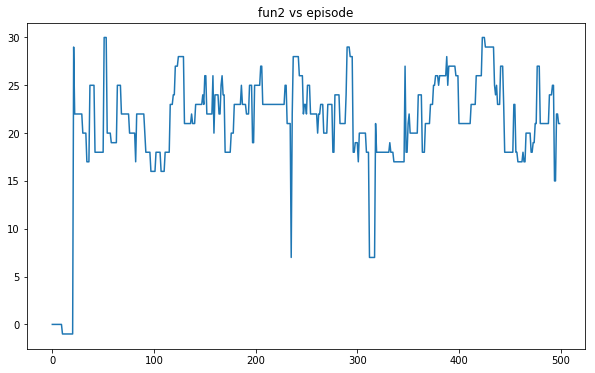

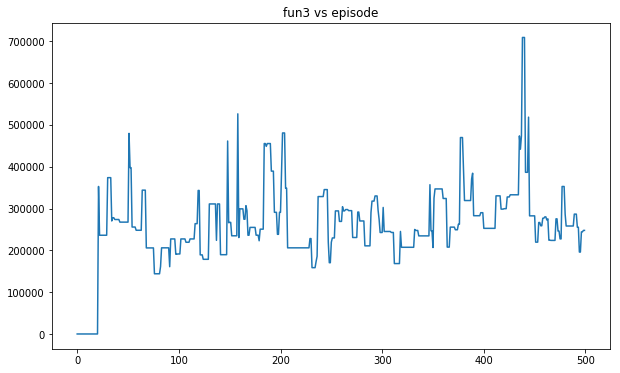

In [12]:
genetic_algorithm()